# Introduction
this project is ANN model for battery state estimation with NASA data as it is a sub-project in the electric vehicle architecture and digital twin project.

In [8]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## NASA data analysis

In [51]:
mat_b5 = loadmat('nasa_data/B0005.mat')
mat_b6 = loadmat('nasa_data/B0006.mat')
mat_b7 = loadmat('nasa_data/B0007.mat')
mat_b18 = loadmat('nasa_data/B0018.mat')
print('dataset5', len(mat_b5['B0005'][0, 0]['cycle'][0]), 
      'dataset6', len(mat_b6['B0006'][0, 0]['cycle'][0]),
     'dataset7', len(mat_b7['B0007'][0, 0]['cycle'][0]),
     'dataset18', len(mat_b18['B0018'][0, 0]['cycle'][0]))

dataset5 616 dataset6 616 dataset7 616 dataset18 319


**battery data structure**
![battery data structure](img/img1.png) 
**charge  data structure**
![charge data structure](img/charge_data.png) 
**discharge data structure**
![discharge data structure](img/discharge_data.png) 

In [52]:
charge = mat_b5['B0005'][0, 0]['cycle'][0,0]
charge

(array(['charge'], dtype='<U6'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.3000e+01, 8.0000e+00,
        1.7921e+01]]), array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
           

In [53]:
charge['data']

array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
                4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
                4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
           

In [54]:
discharge = mat_b5['B0005'][0, 0]['cycle'][0,1]
discharge

(array(['discharge'], dtype='<U9'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.5000e+01, 2.5000e+01,
        4.1593e+01]]), array([[(array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
                3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
                3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
                3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
                3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
                3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
                3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
                3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
                3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
                3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
                3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        

**capacity exists in discharge**

In [55]:
discharge['data'][0][0]['Capacity']

array([[1.85648742]])

In [56]:
discharge['data'][0][0]['Voltage_measured']

array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
        3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
        3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
        3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
        3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
        3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
        3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
        3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
        3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
        3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
        3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
        3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
        3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
        3.61188181, 3.60857868, 3.60553494, 3.60

In [57]:
print('discharge', discharge['data'][0][0]['Capacity'], 
      '\nvoltage', discharge['data'][0][0]['Voltage_measured'],
     '\ncurrent', discharge['data'][0][0]['Current_measured'],
     '\ntemperature', discharge['data'][0][0]['Temperature_measured'],
     '\ncurrent_load', discharge['data'][0][0]['Current_load'],
     '\nvoltage_load', discharge['data'][0][0]['Voltage_load'],
     '\time', discharge['data'][0][0]['Time'])


discharge [[1.85648742]] 
voltage [[4.19149181 4.19074907 3.97487091 3.95171671 3.93435249 3.92005844
  3.90790351 3.89703572 3.88747658 3.87895859 3.87101598 3.86347968
  3.85666051 3.85001358 3.84384191 3.83768798 3.83193825 3.82641444
  3.82109573 3.81589666 3.81069682 3.80583738 3.80112163 3.79629313
  3.79144891 3.78662469 3.78206292 3.7771754  3.77240629 3.76793746
  3.7632293  3.75851149 3.75421321 3.7496292  3.74516886 3.74100501
  3.73669983 3.73248271 3.72835255 3.72453324 3.72065103 3.71640901
  3.71279184 3.70842761 3.70479177 3.70068258 3.69675771 3.69303933
  3.6891768  3.68521448 3.68149374 3.67779221 3.67406181 3.67030176
  3.66673391 3.66299805 3.65966439 3.65589414 3.65232651 3.64876348
  3.64554686 3.64207625 3.63846406 3.63507607 3.63166482 3.62857854
  3.6250126  3.62158223 3.61846125 3.61506725 3.61188181 3.60857868
  3.60553494 3.6021859  3.59885715 3.59576709 3.59301666 3.58971009
  3.5866522  3.58344204 3.58048534 3.57725048 3.57436883 3.57128513
  3.56872067 3

Coulomb calculation </br>
Coulomb = ((current_now + current_previous)/2)/(time_now - time_previous) </br>
(current_now + current_previous)/2 is because measurement time inverval is long in data. so i want to make them smooth. </br>
data is measured with constant current. so it is not necessary to use many history data.

In [58]:
coulomb = ((discharge['data'][0][0]['Current_measured'][0][0]+discharge['data'][0][0]['Current_measured'][0][1])/2)/(discharge['data'][0][0]['Time'][0][1]-discharge['data'][0][0]['Time'][0][0])
coulomb

-0.00019008386744250041

In [ ]:
b5_plot_df = b5_capacity.loc[(b5_capacity['cycle']>=1),['cycle','capacity']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(b5_plot_df['cycle'], b5_plot_df['capacity'])
plt.plot(b6_plot_df['cycle'], b6_plot_df['capacity'])
plt.plot(b7_plot_df['cycle'], b7_plot_df['capacity'])
plt.plot(b18_plot_df['cycle'], b18_plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(b5_capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)

Check one discharge cycle data

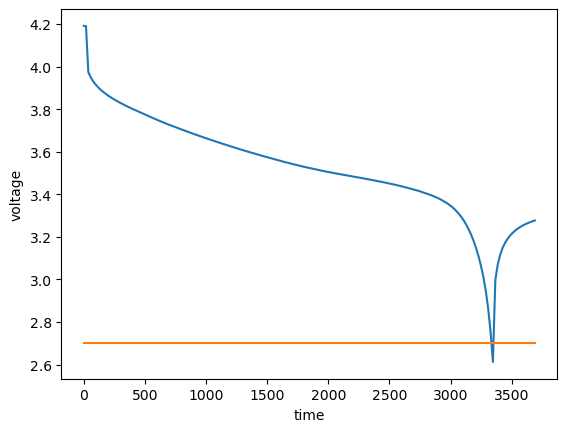

In [82]:
plt.xlabel("time")
plt.ylabel("voltage")
plt.plot(discharge['data'][0][0]['Time'][0], discharge['data'][0][0]['Voltage_measured'][0])
time_len = len(discharge['data'][0][0]['Time'][0])
plt.plot([0,discharge['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])


In [133]:
b5_cycle_arr = []
b5_cycle_arr = mat_b5['B0005'][0, 0]['cycle'][0,]
len(b5_cycle_arr)

616

In [134]:
print(b5_cycle_arr[0]['type'], cycle_arr[1]['type'])

['charge'] ['discharge']


In [135]:
b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0]

array([3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
       4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
       4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
       4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
       4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
       4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
       4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
       4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
       4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
       4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
       4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
       4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
       4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
       4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
       4.12656627, 4.12731238, 4.12808141, 4.12845744, 4.12895

In [136]:
b5_cycle_arr[1]['data'][0][0]['Voltage_measured'][0]

array([4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
       3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
       3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
       3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
       3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
       3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
       3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
       3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
       3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
       3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
       3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
       3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
       3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
       3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
       3.61188181, 3.60857868, 3.60553494, 3.6021859 , 3.59885

useless double array make complex </br>
**check voltage during discarge**

Text(0.5, 1.0, 'Discharge Voltage')

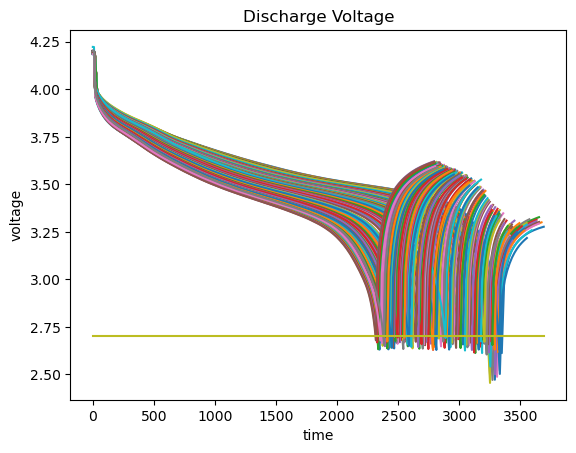

In [137]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'discharge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
        
time_len = len(b5_cycle_arr[1]['data'][0][0]['Time'][0])
plt.plot([0,b5_cycle_arr[1]['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])

plt.title('Discharge Voltage')

it looks data no problem </br>
**check voltage during charge**

Text(0.5, 1.0, 'Charge Voltage')

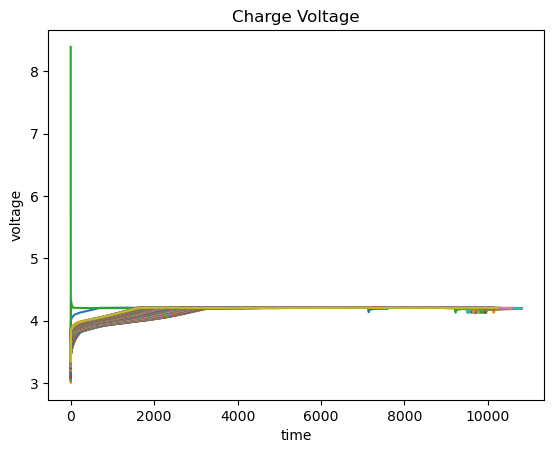

In [138]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])

plt.title('Charge Voltage')

it looks strange
check them again in time scale up

Text(0.5, 1.0, 'Charge Voltage')

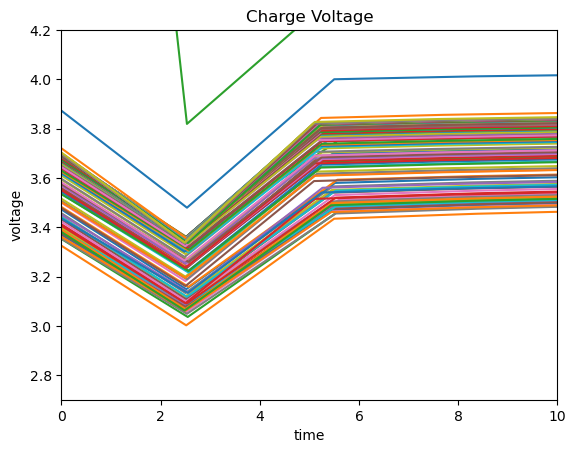

In [139]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(b5_cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

Text(0.5, 1.0, 'Charge Voltage')

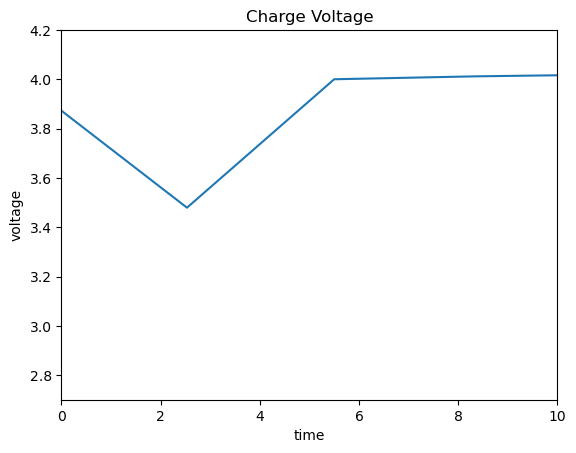

In [140]:
plt.xlabel("time")
plt.ylabel("voltage")


plt.plot(b5_cycle_arr[0]['data'][0][0]['Time'][0], b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

as shown voltage data during charging, I guess there was some experimental problems </br>
So, i cannot use the data during charging cycle

## Reshape discharge data

In [312]:
coulomb = ((discharge['data'][0][0]['Current_measured'][0][0]+discharge['data'][0][0]['Current_measured'][0][1])/2)*(discharge['data'][0][0]['Time'][0][1]-discharge['data'][0][0]['Time'][0][0])/3600
coulomb

-1.486888606285338e-05

In [ ]:
discharge_arr[cycle_counter]['Voltage_measured'] = cycle_arr[i]['data'][0][0]['Current_measured'][0]
            temperature = cycle_arr[i]['data'][0][0]['Temperature_measured'][0]
            current_load = cycle_arr[i]['data'][0][0]['Current_load'][0]
            voltage_load = cycle_arr[i]['data'][0][0]['Voltage_load'][0]
            time = voltage_load = cycle_arr[i]['data'][0][0]['Time'][0]

In [162]:
cycle_arr[0]['data'][0][0]['Voltage_measured'][0]

array([3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
       4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
       4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
       4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
       4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
       4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
       4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
       4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
       4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
       4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
       4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
       4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
       4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
       4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
       4.12656627, 4.12731238, 4.12808141, 4.12845744, 4.12895

In [206]:
discharge_arr = []
voltage = []
data_ = []
voltage = cycle_arr[0]['data'][0][0]['Voltage_measured'][0]
current = cycle_arr[0]['data'][0][0]['Current_measured'][0]
data_ = cycle_arr[0]['data'][0][0]
count = 1

discharge_arr.append([count, data_])

#discharge_arr[0][1]
discharge_arr[0]

[1,
 (array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
         4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
         4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
         4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
         4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
         4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
         4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
         4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
         4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
         4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
         4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
         4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
         4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
         4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
         4.12656627, 4.127312

In [600]:
def reshape_discharge_data(cycle_arr, term_voltage):
    discharge_arr = []
    voltage = []
    current = []
    temperature = []
    current_load = []
    voltage_load = []
    time = []
    counter = 0
    
    for i in range(len(cycle_arr)-1):
        if(cycle_arr[i]['type'] == 'discharge'):
            voltage = cycle_arr[i]['data'][0][0]['Voltage_measured'][0]
            current = cycle_arr[i]['data'][0][0]['Current_measured'][0]
            temperature = cycle_arr[i]['data'][0][0]['Temperature_measured'][0]
            current_load = cycle_arr[i]['data'][0][0]['Current_load'][0]
            voltage_load = cycle_arr[i]['data'][0][0]['Voltage_load'][0]
            time = cycle_arr[i]['data'][0][0]['Time'][0]
            capacity = cycle_arr[i]['data'][0][0]['Capacity'][0][0]
            
            counter = counter + 1
            coulomb = []
            acc_capacity_list = []
            acc_capacity = 0.0
            coulomb.append(0.0)
            acc_capacity_list.append(0.0)
            coulomb_capacity = 0.0
            acc_flag = 1 # after discharging stop, prevent increasing capacity from voltage jump
            print(len(time))
            for j in range(1, len(time)):
                coulomb.append((((current[j]+current[j-1])/2)*(time[j]-time[j-1]))/3600.0)
                acc_capacity = acc_capacity + coulomb[j]
                acc_capacity_list.append(acc_capacity)
                if voltage[j] < term_voltage and acc_flag: #record and prevent re-recording from voltage jump when stopping discharge.
                    coulomb_capacity = acc_capacity
                    #print(voltage[j], current[j], (current[j]+current[j-1])/2, coulomb[j], coulomb_capacity)
                    acc_flag = 0
            discharge_arr.append([counter, capacity, coulomb_capacity, 
                                  voltage, current, temperature, coulomb, current_load, voltage_load, time, acc_capacity_list])

            
    return discharge_arr

# It looks like experiment is not managed well
# data sizes are jumped at some cycle points

197
196
195
194
194
195
195
191
190
190
189
187
186
186
185
184
183
182
182
192
190
189
187
188
184
184
183
183
183
182
371
365
363
362
360
360
359
357
356
355
355
354
179
354
352
350
349
356
356
353
351
350
349
349
348
347
346
346
345
345
343
343
342
341
341
340
339
338
338
337
336
336
335
334
333
333
333
333
331
330
330
330
329
329
327
326
326
326
325
339
329
328
327
326
325
324
324
323
322
322
321
320
321
322
320
319
316
318
317
317
316
315
315
315
314
313
312
312
312
314
315
313
312
311
311
309
309
309
308
307
307
307
308
309
308
307
306
306
306
305
304
304
304
303
303
302
302
302
301
302
305
303
302
302
301
301
300
300
299
299
298
298
298
297
297
297
298
300


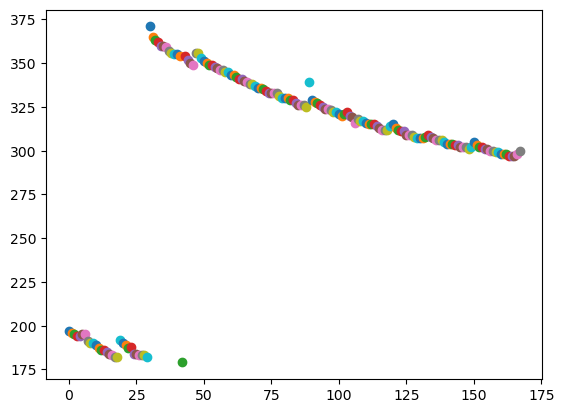

In [604]:
b5_discharge = []
b5_discharge = reshape_discharge_data(b5_cycle_arr, 2.7)
for i in range(len(b5_discharge)):
    plt.plot(i, len(b5_discharge[i][9]), 'o')

# Compare coulomb values with current values

In [607]:
print(len(b5_discharge[100][4]), len(b5_discharge[100][6]))
for i in range(len(b5_discharge[100][4]) - 1):
    print(b5_discharge[100][4][i], b5_discharge[100][6][i], b5_discharge[100][10][i])

321 321
0.0011188537018346392 0.0 0.0
-0.0001888295112962986 1.2089022776733782e-06 1.2089022776733782e-06
-2.011843617689111 -0.002842554729572576 -0.0028413458272949026
-2.0138481609468086 -0.005276451849303773 -0.008117797676598676
-2.0107848493868583 -0.005258294823362337 -0.013376092499961013
-2.012690451978615 -0.005203694723099344 -0.018579787223060355
-2.0116797698914 -0.005213795198556043 -0.0237935824216164
-2.0106597720597765 -0.005211164339905629 -0.029004746761522027
-2.0109471189729637 -0.005245404210234512 -0.034250150971756536
-2.0114830764869844 -0.00522860058323745 -0.03947875155499399
-2.012890463185835 -0.00524006971311565 -0.04471882126810964
-2.010501090100254 -0.005230409019271924 -0.04994923028738156
-2.012790422383167 -0.005229720175740599 -0.055178950463122156
-2.0119693939463934 -0.005232187761228428 -0.06041113822435058
-2.0113894202229234 -0.005212484863690472 -0.06562362308804105
-2.010803054908374 -0.0052456093529837265 -0.07086923244102478
-2.01112223892

# Verify NASA dataset with accumulated capacity

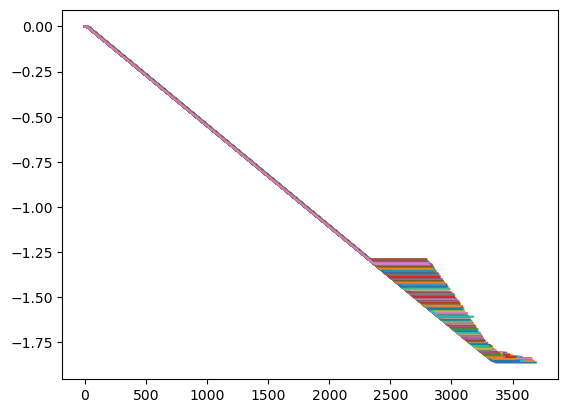

In [610]:
for i in range(len(b5_discharge)-1):
    plt.plot(b5_discharge[i][9], b5_discharge[i][10])

# Compare original capacity in NASA dataset with calculated capacity with coulomb
orginal capacity was strange due to capacity jump during aging cycle</br>
so i calculate capacity with coulomb accumulation, but they are the same. </br>
it looks like some problems in data.</br>
How do researchers study estimation algorithms with this data?

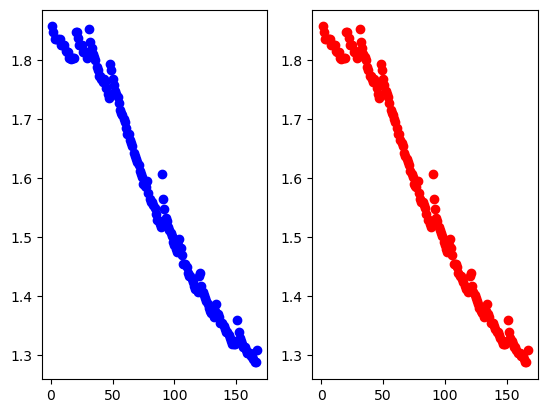

In [617]:
for i in range(len(b5_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot(b5_discharge[i][0], b5_discharge[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.plot(b5_discharge[i][0], -b5_discharge[i][2], 'ro')


In [614]:
for i in range(len(b5_discharge)-1):
    print(len(b5_discharge[i][3]), 
          len(b5_discharge[i][4]), 
          len(b5_discharge[i][6]),
          len(b5_discharge[i][7]),
         len(b5_discharge[i][8]),
         len(b5_discharge[i][9]))

197 197 197 197 197 197
196 196 196 196 196 196
195 195 195 195 195 195
194 194 194 194 194 194
194 194 194 194 194 194
195 195 195 195 195 195
195 195 195 195 195 195
191 191 191 191 191 191
190 190 190 190 190 190
190 190 190 190 190 190
189 189 189 189 189 189
187 187 187 187 187 187
186 186 186 186 186 186
186 186 186 186 186 186
185 185 185 185 185 185
184 184 184 184 184 184
183 183 183 183 183 183
182 182 182 182 182 182
182 182 182 182 182 182
192 192 192 192 192 192
190 190 190 190 190 190
189 189 189 189 189 189
187 187 187 187 187 187
188 188 188 188 188 188
184 184 184 184 184 184
184 184 184 184 184 184
183 183 183 183 183 183
183 183 183 183 183 183
183 183 183 183 183 183
182 182 182 182 182 182
371 371 371 371 371 371
365 365 365 365 365 365
363 363 363 363 363 363
362 362 362 362 362 362
360 360 360 360 360 360
360 360 360 360 360 360
359 359 359 359 359 359
357 357 357 357 357 357
356 356 356 356 356 356
355 355 355 355 355 355
355 355 355 355 355 355
354 354 354 354 

orginal capaacity was strange </br>
so i calculate capacity with coulomb accumulation, but they are the same. </br>
it looks like some problems in data.</br>
How do researchers study estimation algorithms with this data?

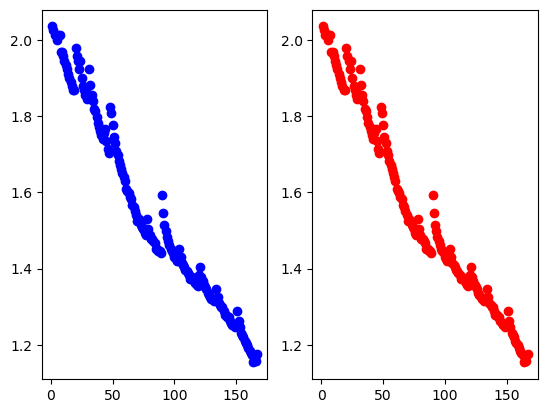

In [522]:
b6_cycle_arr = []
b6_cycle_arr = mat_b6['B0006'][0, 0]['cycle'][0,]
b6_discharge = []
b6_discharge = reshape_discharge_data(b6_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b6_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b6_discharge[i][0]], [b6_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b6_discharge[i][0]], [-b6_discharge[i][2]], 'ro')

B0006 is also strange

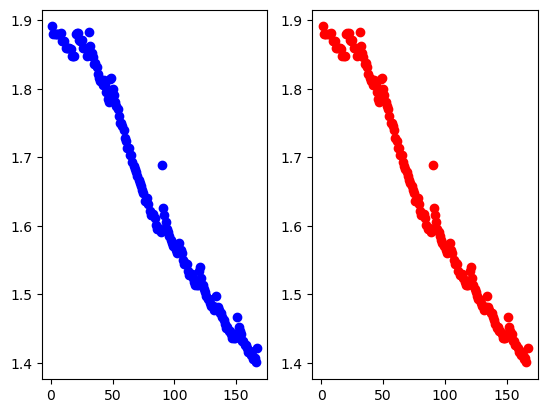

In [523]:
b7_cycle_arr = []
b7_cycle_arr = mat_b7['B0007'][0, 0]['cycle'][0,]
b7_discharge = []
b7_discharge = reshape_discharge_data(b7_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b7_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b7_discharge[i][0]], [b7_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b7_discharge[i][0]], [-b7_discharge[i][2]], 'ro')

B0007 is also strange

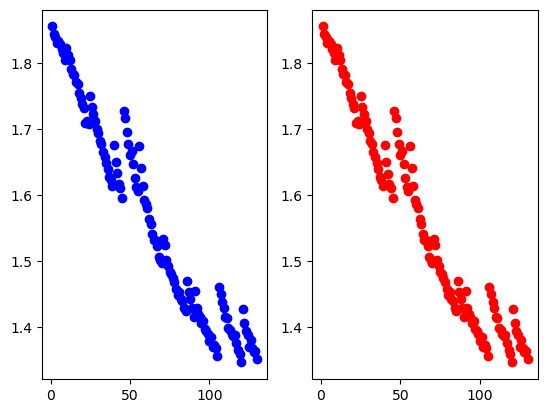

In [524]:
b18_cycle_arr = []
b18_cycle_arr = mat_b18['B0018'][0, 0]['cycle'][0,]
b18_discharge = []
b18_discharge = reshape_discharge_data(b18_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b18_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b18_discharge[i][0]], [b18_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b18_discharge[i][0]], [-b18_discharge[i][2]], 'ro')

B0018 is also strange

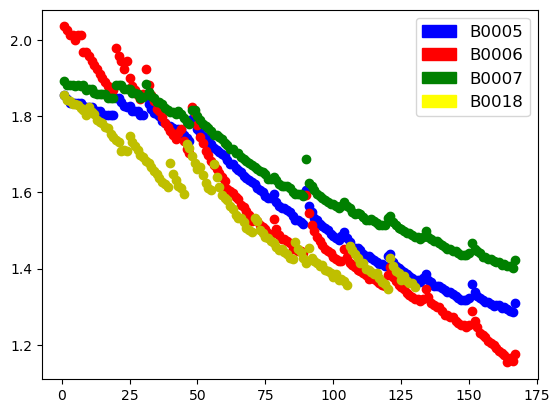

In [618]:
import matplotlib.patches as mpatches

for i in range(len(b5_discharge)-1):
    plt.plot([b5_discharge[i][0]], [b5_discharge[i][1]], 'bo')
for i in range(len(b6_discharge)-1):
    plt.plot([b6_discharge[i][0]], [b6_discharge[i][1]], 'ro')
for i in range(len(b7_discharge)-1):
    plt.plot([b7_discharge[i][0]], [b7_discharge[i][1]], 'go')  
for i in range(len(b18_discharge)-1):
    plt.plot([b18_discharge[i][0]], [b18_discharge[i][1]], 'yo')
#plt.legend(['B0005', 'B0006', 'B0007', 'B0018'], color=['blue','red','green','yellow'])

legend_b0005 = mpatches.Patch(color='blue',label='B0005')
legend_b0006 = mpatches.Patch(color='red',label='B0006')
legend_b0007 = mpatches.Patch(color='green',label='B0007')
legend_b0018 = mpatches.Patch(color='yellow',label='B0018')
plt.legend(handles=[legend_b0005, legend_b0006, legend_b0007,legend_b0018], 
           loc ='upper right', frameon=True, fontsize = 12,
         facecolor='white', labelcolor='black',
          bbox_to_anchor=(1, 1))

In [619]:
def SOH_target_calculation(discharge_arr):
    SOH_target = []
    initial_capacity = discharge_arr[0][1]
    for i in range(len(discharge_arr)-1):
        cycle = discharge_arr[i][0]
        capacity = discharge_arr[i][1]
        SOH = capacity/initial_capacity
        SOH_target.append([cycle, capacity, SOH])
    return pd.DataFrame(data=SOH_target, columns=['cycle', 'capacity', 'SOH'])

In [623]:
b5_SOH_target = SOH_target_calculation(b5_discharge)
b5_SOH_target

,cycle,capacity,SOH
0,1,1.856487,1.000000
1,2,1.846327,0.994527
2,3,1.835349,0.988614
3,4,1.835263,0.988567
4,5,1.834646,0.988235
...,...,...,...
162,163,1.298074,0.699209
163,164,1.293464,0.696726
164,165,1.288003,0.693785
165,166,1.287453,0.693488


# SOH verification
SOH is also jumped due to capacity jump in dataset.

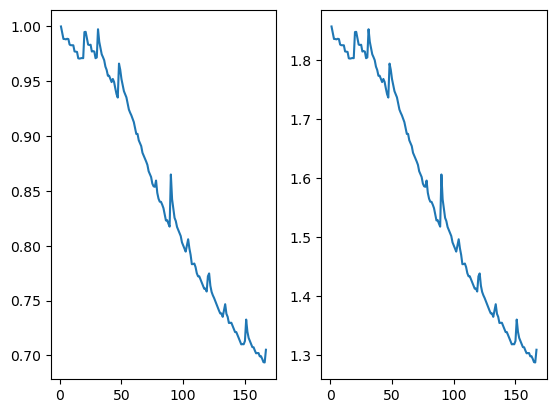

In [624]:
plt.subplot(1,2,1)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['SOH'])
plt.subplot(1,2,2)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['capacity'])

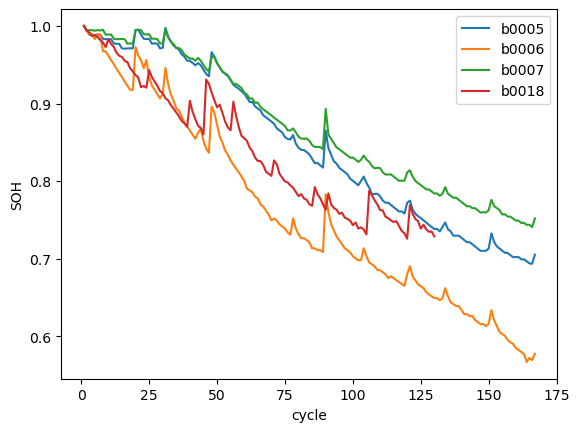

In [632]:
b6_SOH_target = SOH_target_calculation(b6_discharge)
b7_SOH_target = SOH_target_calculation(b7_discharge)
b18_SOH_target = SOH_target_calculation(b18_discharge)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['SOH'])
plt.plot(b6_SOH_target['cycle'], b6_SOH_target['SOH'])
plt.plot(b7_SOH_target['cycle'], b7_SOH_target['SOH'])
plt.plot(b18_SOH_target['cycle'], b18_SOH_target['SOH'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['b0005', 'b0006', 'b0007', 'b0018'])

# Conclusion: i am not sure if NASA dataset can be trusted
However, many researchers have studied with NASA dataset. So, let me try writing ANN model with NASA dataset.
# Start to write learning model from here

In [635]:
def inout_dataframe(discharge_arr, term_voltage):
    SOH_target = []
    input_features = []
    initial_capacity = discharge_arr[0][1]
    for i in range(len(discharge_arr)-1):
        cycle = discharge_arr[i][0]
        capacity = discharge_arr[i][1]
        SOH = capacity/initial_capacity
        for j in range(len(discharge_arr[i][3])):
            voltage = discharge_arr[i][3][j]
            current = discharge_arr[i][4][j]
            temperature = discharge_arr[i][5][j]
            coulomb = discharge_arr[i][6][j]
            time = discharge_arr[i][9][j]
            
            if voltage >= term_voltage:
                SOH_target.append(SOH)
                input_features.append([cycle, voltage, current, temperature, coulomb, time])
            else:
                break
            
    return [pd.DataFrame(data=SOH_target, columns=['SOH']), 
            pd.DataFrame(data=input_features, columns=['cycle', 'voltage', 'current', 'temperature', 'coulomb', 'time'])]

            #discharge_arr.append([counter, capacity, coulomb_capacity, 
                                  #voltage, current, temperature, coulomb, current_load, voltage_load, time])

In [636]:
b5_SOH_target, b5_inputs = inout_dataframe(b5_discharge, 2.7)
print(b5_SOH_target.shape, b5_inputs.shape)

(45036, 1) (45036, 6)


# for learning
## input features
'voltage', 'current', 'temperature', 'coulomb', 'time'

## target
SOH

In [637]:
b5_SOH_target

,SOH
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
45031,0.705103
45032,0.705103
45033,0.705103
45034,0.705103


In [638]:
b5_inputs

,cycle,voltage,current,temperature,coulomb,time
0,1,4.191492,-0.004902,24.330034,0.000000,0.000
1,1,4.190749,-0.001478,24.325993,-0.000015,16.781
2,1,3.974871,-2.012528,24.389085,-0.005293,35.703
3,1,3.951717,-2.013979,24.544752,-0.010110,53.781
4,1,3.934352,-2.011144,24.731385,-0.010142,71.922
...,...,...,...,...,...,...
45031,167,2.896440,-2.011362,40.302149,-0.005318,2308.016
45032,167,2.866654,-2.014975,40.404162,-0.005347,2317.578
45033,167,2.831597,-2.011871,40.501529,-0.005348,2327.141
45034,167,2.790443,-2.011597,40.649221,-0.005274,2336.578


In [639]:
last = len(b5_SOH_target['SOH'])-1
print(b5_SOH_target['SOH'][last], b5_inputs['voltage'][last])

0.705103277055252 2.740493324451625


In [702]:
input_attributes = ['voltage', 'current', 'temperature', 'coulomb', 'time']
b5_train_inputs = b5_inputs[input_attributes]
scale = MinMaxScaler(feature_range=(0,1))
b5_train_inputs  = scale.fit_transform(b5_train_inputs)
#b5_train_SOH  = scale.fit_transform(b5_SOH_target)
b5_train_SOH  = b5_SOH_target.to_numpy()
last = len(b5_train_SOH)-1
print(b5_train_SOH[last], b5_train_inputs[last][0], b5_inputs['voltage'][last])

[0.70510328] 0.02627202702865672 2.740493324451625


In [703]:
b5_train_SOH

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.70510328],
       [0.70510328],
       [0.70510328]])

In [704]:
b5_train_inputs

array([[0.97935644, 0.99467547, 0.0621255 , 0.99899624, 0.        ],
       [0.97886857, 0.9963578 , 0.06190042, 0.99765782, 0.00504353],
       [0.83706959, 0.00814246, 0.06541503, 0.52255531, 0.01073053],
       ...,
       [0.08611343, 0.00846529, 0.96298032, 0.51755822, 0.6994221 ],
       [0.05908148, 0.00860007, 0.97120767, 0.52430005, 0.70225839],
       [0.02627203, 0.00719961, 0.97840978, 0.52238549, 0.7051043 ]])

In [705]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [836]:
import time

class custom_train:
    def __init__(self, model, optimizer_fn, loss_fn, metric_fn):
        self.model = model
        self.optimizer = optimizer_fn
        self.loss_fn = loss_fn
        self.metrics = metric_fn

    #tf.function
    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            #print(f'x:{x}, y:{y} {type(x)}')
            logits = self.model(x, training=True)
            loss_value = self.loss_fn(y, logits)
        grads = tape.gradient(loss_value, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_weights))
        self.metrics.update_state(y, logits)
        return loss_value

    def train(self, inputs, outputs, epochs, epoch_log, loss_threshold):
        loss_list = []
        epoch_list = []
        start_time = time.time()
        for epoch in range(epochs):
            loss_value = self.train_step(inputs, outputs)
            
            # Display metrics at the end of each epoch.
            train_acc = self.metrics.result()
            
            if epoch%epoch_log==0:
                loss_list.append(loss_value)
                epoch_list.append(epoch)
                print(
                    "Training acc over epoch: %.4f Training loss (for one batch) at step %d: %.4f Time taken: %.2fs " 
                    % (float(train_acc), epoch, float(loss_value), (time.time() - start_time))
                )
            if loss_value <= loss_threshold:
                break
            # Reset training metrics at the end of each epoch
            self.metrics.reset_states()
            
        return loss_list, epoch_list

In [837]:
loss_list = []
epoch_list = []

input_layer = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer = keras.layers.Dense(10, activation='relu')(input_layer)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer)
model = keras.Model(input_layer, output_layer)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train = custom_train(model, optimizer, loss_function, metric)
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_44 (Dense)            (None, 10)                60        
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [879]:
loss_list, epoch_list = my_train.train(b5_train_inputs, b5_train_SOH, 2000, 200, 0.001)

Training acc over epoch: 0.1181 Training loss (for one batch) at step 0: 0.0258 Time taken: 0.02s 
Training acc over epoch: 0.1157 Training loss (for one batch) at step 200: 0.0248 Time taken: 2.79s 
Training acc over epoch: 0.1117 Training loss (for one batch) at step 400: 0.0231 Time taken: 5.46s 
Training acc over epoch: 0.1060 Training loss (for one batch) at step 600: 0.0209 Time taken: 8.31s 
Training acc over epoch: 0.1000 Training loss (for one batch) at step 800: 0.0188 Time taken: 10.97s 
Training acc over epoch: 0.0939 Training loss (for one batch) at step 1000: 0.0168 Time taken: 13.65s 
Training acc over epoch: 0.0879 Training loss (for one batch) at step 1200: 0.0150 Time taken: 16.32s 
Training acc over epoch: 0.0824 Training loss (for one batch) at step 1400: 0.0135 Time taken: 18.97s 
Training acc over epoch: 0.0776 Training loss (for one batch) at step 1600: 0.0122 Time taken: 21.67s 
Training acc over epoch: 0.0735 Training loss (for one batch) at step 1800: 0.0110 T

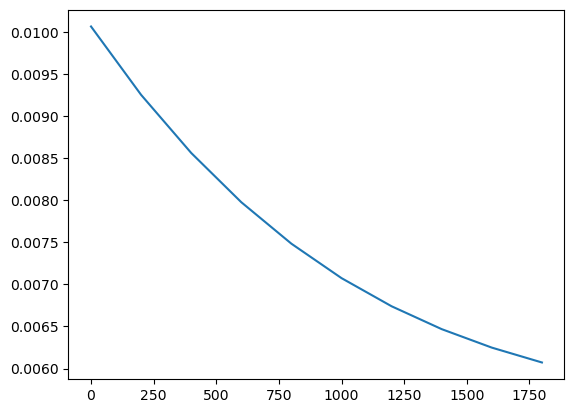

In [884]:
plt.plot(epoch_list, loss_list)

In [885]:
b6_SOH_target, b6_inputs = inout_dataframe(b6_discharge, 2.5)

b6_validation_inputs = b6_inputs[input_attributes]
b6_validation_inputs  = scale.fit_transform(b6_validation_inputs)
print(b6_SOH_target.shape,b6_inputs.shape, b6_validation_inputs.shape)

(44291, 1) (44291, 6) (44291, 5)


In [886]:
b6_SOH_predict = model.predict(b6_validation_inputs)

1385/1385 [==============================] - 1s 1ms/step


In [887]:
b6_SOH_predict.shape

(44291, 1)

In [888]:
b6_SOH_predict

array([[0.4161517 ],
       [0.44808072],
       [0.8621936 ],
       ...,
       [0.01124044],
       [0.00915394],
       [0.00675826]], dtype=float32)

In [889]:
last = len(b6_SOH_target['SOH'])-1
print(b6_SOH_target['SOH'][last], b6_inputs['cycle'][last], len(b6_SOH_target['SOH']), len(b6_SOH_predict))

0.5772874675283711 167 44291 44291


In [890]:
b6_SOH_validation = b6_inputs.loc[(b6_inputs['cycle'] >= 1), ['cycle']]
b6_SOH_validation['SOH_predict'] = b6_SOH_predict
b6_SOH_validation['SOH_target'] = b6_SOH_target.to_numpy()
b6_SOH_validation

,cycle,SOH_predict,SOH_target
0,1,0.416152,1.000000
1,1,0.448081,1.000000
2,1,0.862194,1.000000
3,1,0.994280,1.000000
4,1,0.992977,1.000000
...,...,...,...
44286,167,0.015934,0.577287
44287,167,0.013332,0.577287
44288,167,0.011240,0.577287
44289,167,0.009154,0.577287


In [891]:
rms = np.sqrt(mean_squared_error(b6_SOH_validation['SOH_predict'], b6_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.41719247416393024


# The results come from where the model learns from B0005 and validate with B0006

Text(0.5, 1.0, 'SOH real-time prediction')

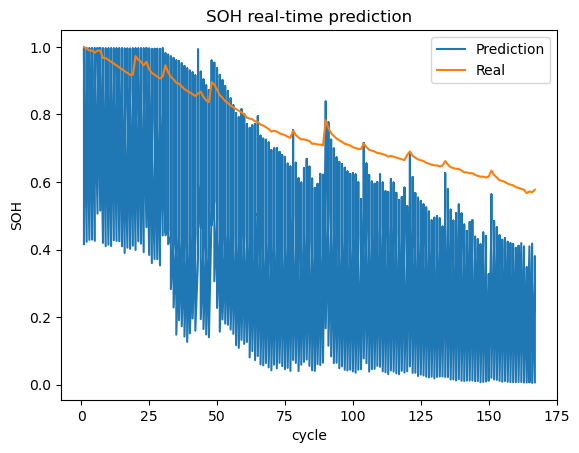

In [892]:
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_predict'])
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

In [893]:
b6_SOH_validation_mean = b6_SOH_validation.groupby(['cycle']).mean().reset_index()
b6_SOH_validation_mean

,cycle,SOH_predict,SOH_target
0,1,0.978964,1.000000
1,2,0.979901,0.994990
2,3,0.980463,0.989185
3,4,0.980424,0.989165
4,5,0.979833,0.982898
...,...,...,...
162,163,0.027167,0.577101
163,164,0.022438,0.566893
164,165,0.025972,0.572092
165,166,0.025613,0.569339


In [916]:
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.4113572920049391


# Result shows that mean_SOH is better than real-time SOH although both results are poor

Text(0.5, 1.0, 'SOH real-time prediction')

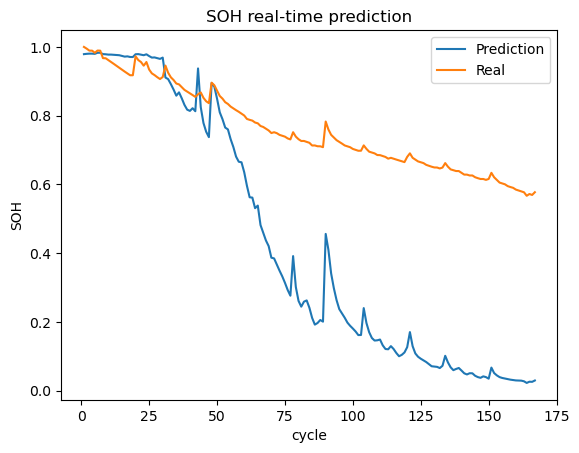

In [917]:
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

# Validation with with B0007

In [918]:
b7_SOH_target, b7_inputs = inout_dataframe(b7_discharge, 2.2)

b7_validation_inputs = b7_inputs[input_attributes]
b7_validation_inputs  = scale.fit_transform(b7_validation_inputs)
b7_SOH_predict = model.predict(b7_validation_inputs)

1506/1506 [==============================] - 2s 1ms/step


In [919]:
b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.12168697492203077


# The results come from where the model learns from B0005 and validate with B0007

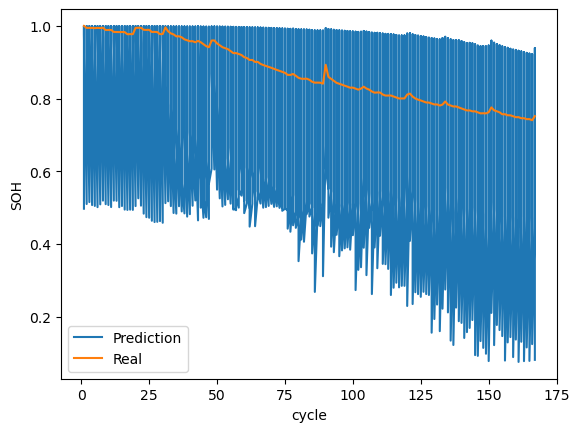

In [920]:
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

In [921]:
b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
b7_SOH_validation_mean

,cycle,SOH_predict,SOH_target
0,1,0.991529,1.000000
1,2,0.991880,0.994492
2,3,0.991955,0.994506
3,4,0.991792,0.994563
4,5,0.991727,0.993865
...,...,...,...
162,163,0.836779,0.746143
163,164,0.836446,0.743592
164,165,0.833676,0.743679
165,166,0.833328,0.740569


# Result shows that mean_SOH is better than real-time SOH although both results are poor

In [922]:
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.0861854260240201


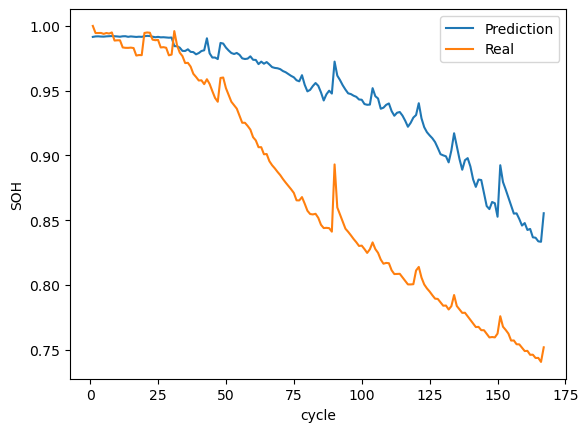

In [923]:
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

# Validation with with B0018

In [932]:
b18_SOH_target, b18_inputs = inout_dataframe(b18_discharge, 2.5)

b18_validation_inputs = b18_inputs[input_attributes]
b18_idation_inputs  = scale.fit_transform(b18_validation_inputs)
b18_SOH_predict = model.predict(b18_validation_inputs)

993/993 [==============================] - 1s 980us/step


In [933]:
b18_SOH_validation = b18_inputs.loc[(b18_inputs['cycle'] >= 1), ['cycle']]
b18_SOH_validation['SOH_predict'] = b18_SOH_predict
b18_SOH_validation['SOH_target'] = b18_SOH_target.to_numpy()
rms = np.sqrt(mean_squared_error(b18_SOH_validation['SOH_predict'], b18_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.16508602966196895


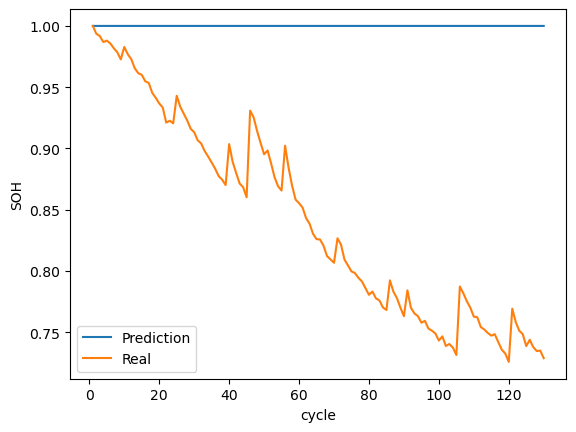

In [934]:
plt.plot(b18_SOH_validation['cycle'], b18_SOH_validation['SOH_predict'])
plt.plot(b18_SOH_validation['cycle'], b18_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

In [935]:
b18_SOH_validation_mean = b18_SOH_validation.groupby(['cycle']).mean().reset_index()
b18_SOH_validation_mean

,cycle,SOH_predict,SOH_target
0,1,1.0,1.000000
1,2,1.0,0.993634
2,3,1.0,0.991697
3,4,1.0,0.986884
4,5,1.0,0.987976
...,...,...,...
125,126,1.0,0.743769
126,127,1.0,0.737820
127,128,1.0,0.734627
128,129,1.0,0.734987


In [936]:
rms = np.sqrt(mean_squared_error(b18_SOH_validation_mean['SOH_predict'], b18_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.1787661766306532


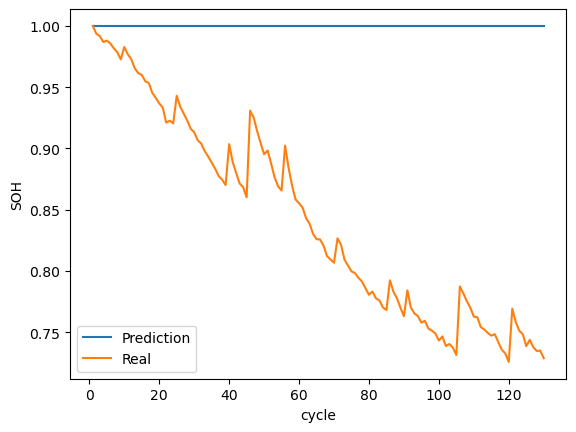

In [937]:
plt.plot(b18_SOH_validation_mean['cycle'], b18_SOH_validation_mean['SOH_predict'])
plt.plot(b18_SOH_validation_mean['cycle'], b18_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

# Training with 0007

In [940]:
input_attributes = ['voltage', 'current', 'temperature', 'coulomb', 'time']
b7_train_inputs = b7_inputs[input_attributes]
scale = MinMaxScaler(feature_range=(0,1))
b7_train_inputs  = scale.fit_transform(b7_train_inputs)
b7_train_SOH  = b7_SOH_target.to_numpy()
last = len(b7_train_SOH)-1
print(b7_train_SOH[last], b7_train_inputs[last][0], b7_inputs['voltage'][last])

[0.75184938] 0.0132320260218306 2.2279347416731947


In [950]:
loss_list = []
epoch_list = []

input_layer_b7 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7 = keras.layers.Dense(10, activation='relu')(input_layer_b7)
output_layer_b7 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer_b7)
model_b7 = keras.Model(input_layer_b7, output_layer_b7)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7 = custom_train(model_b7, optimizer, loss_function, metric)
model_b7.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_54 (Dense)            (None, 10)                60        
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [990]:
loss_list, epoch_list = my_train_b7.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.0001)

Training acc over epoch: 0.0300 Training loss (for one batch) at step 0: 0.0018 Time taken: 0.01s 
Training acc over epoch: 0.0297 Training loss (for one batch) at step 200: 0.0018 Time taken: 2.83s 
Training acc over epoch: 0.0295 Training loss (for one batch) at step 400: 0.0017 Time taken: 5.60s 
Training acc over epoch: 0.0292 Training loss (for one batch) at step 600: 0.0017 Time taken: 8.44s 
Training acc over epoch: 0.0290 Training loss (for one batch) at step 800: 0.0017 Time taken: 11.18s 
Training acc over epoch: 0.0288 Training loss (for one batch) at step 1000: 0.0017 Time taken: 13.91s 
Training acc over epoch: 0.0287 Training loss (for one batch) at step 1200: 0.0016 Time taken: 16.63s 
Training acc over epoch: 0.0285 Training loss (for one batch) at step 1400: 0.0016 Time taken: 19.41s 
Training acc over epoch: 0.0284 Training loss (for one batch) at step 1600: 0.0016 Time taken: 22.24s 
Training acc over epoch: 0.0283 Training loss (for one batch) at step 1800: 0.0016 T

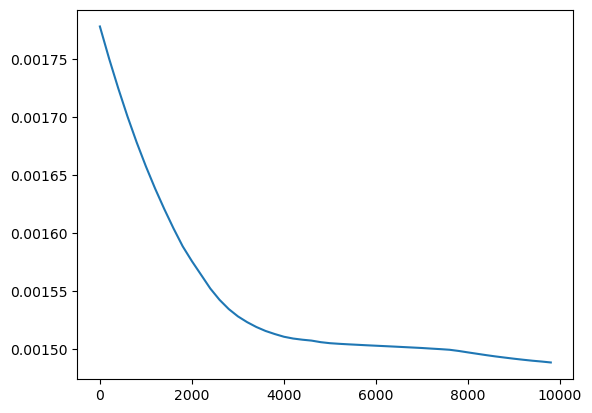

In [991]:
plt.plot(epoch_list, loss_list)

In [992]:
b6_SOH_target, b6_inputs = inout_dataframe(b6_discharge, 2.5)

b6_validation_inputs = b6_inputs[input_attributes]
b6_validation_inputs  = scale.fit_transform(b6_validation_inputs)
print(b6_SOH_target.shape,b6_inputs.shape, b6_validation_inputs.shape)

(44291, 1) (44291, 6) (44291, 5)


1385/1385 [==============================] - 1s 946us/step
Root Mean Square Error:  0.12607889423369528


Text(0.5, 1.0, 'SOH real-time prediction')

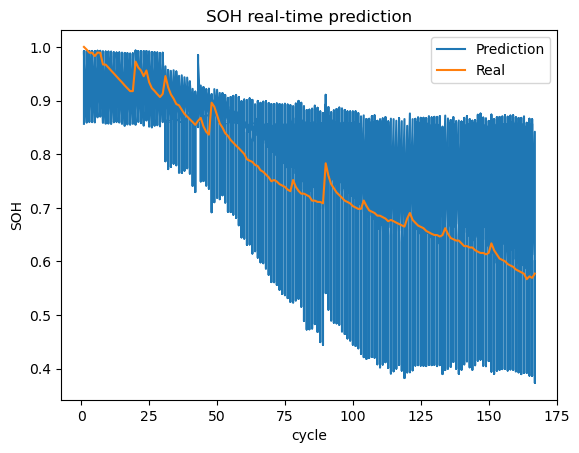

In [993]:
b6_SOH_predict = model_b7.predict(b6_validation_inputs)


b6_SOH_validation = b6_inputs.loc[(b6_inputs['cycle'] >= 1), ['cycle']]
b6_SOH_validation['SOH_predict'] = b6_SOH_predict
b6_SOH_validation['SOH_target'] = b6_SOH_target.to_numpy()
b6_SOH_validation
rms = np.sqrt(mean_squared_error(b6_SOH_validation['SOH_predict'], b6_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_predict'])
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

Root Mean Square Error:  0.09642640790376765


Text(0.5, 1.0, 'SOH real-time prediction')

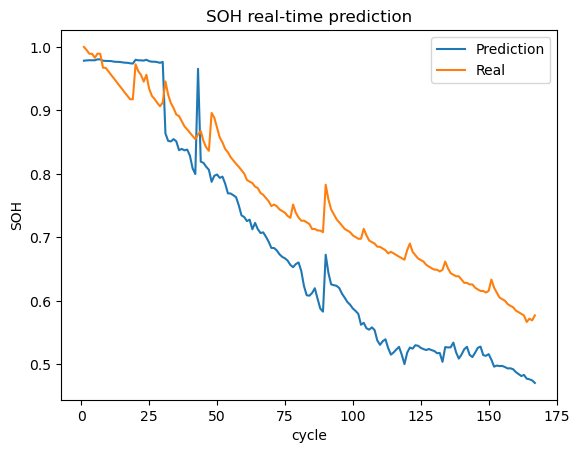

In [994]:
b6_SOH_validation_mean = b6_SOH_validation.groupby(['cycle']).mean().reset_index()
b6_SOH_validation_mean
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))

print('Root Mean Square Error: ', rms)
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

In [995]:
b7_SOH_predict = model_b7.predict(b7_validation_inputs)

1499/1499 [==============================] - 1s 905us/step


Root Mean Square Error:  0.10160740895662564
Root Mean Square Error:  0.07731907604177506


Text(0.5, 1.0, 'SOH real-time prediction')

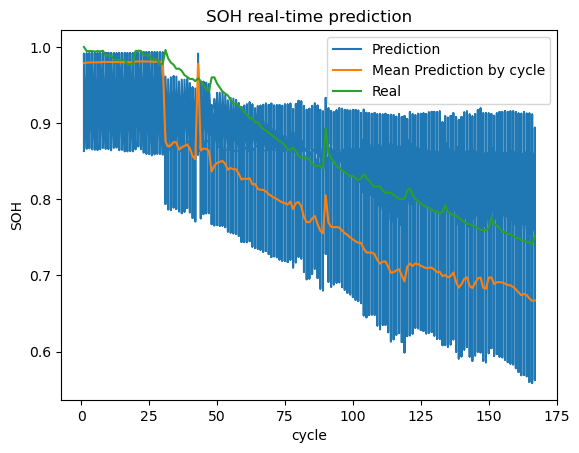

In [1014]:
b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1015]:
b7_SOH_target, b7_inputs = inout_dataframe(b7_discharge, 2.5)

b7_validation_inputs = b7_inputs[input_attributes]
b7_validation_inputs  = scale.fit_transform(b7_validation_inputs)

Root Mean Square Error:  0.09642640790376765


Text(0.5, 1.0, 'SOH real-time prediction')

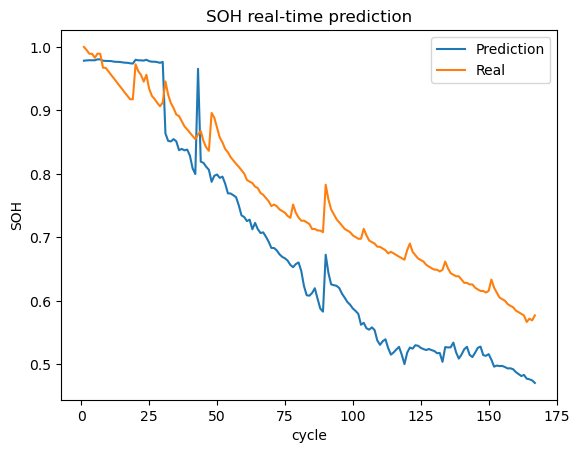

In [1016]:
b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
b7_SOH_validation_mean
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))

print('Root Mean Square Error: ', rms)
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

# Two hidden layer

In [1039]:
input_layer_b7_2h = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_2h = keras.layers.Dense(10, activation='relu')(input_layer_b7_2h)
hidden_layer2_b7_2h = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_2h)
output_layer_b7_2h = keras.layers.Dense(1, activation='sigmoid')(hidden_layer2_b7_2h)
model_b7_2h = keras.Model(input_layer_b7_2h, output_layer_b7_2h)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_2h = custom_train(model_b7_2h, optimizer, loss_function, metric)
model_b7_2h.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_66 (Dense)            (None, 10)                60        
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [1044]:
loss_list, epoch_list = my_train_b7_2h.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0118 Training loss (for one batch) at step 0: 0.0004 Time taken: 0.02s 
Training acc over epoch: 0.0117 Training loss (for one batch) at step 200: 0.0004 Time taken: 2.84s 
Training acc over epoch: 0.0116 Training loss (for one batch) at step 400: 0.0004 Time taken: 5.75s 
Training acc over epoch: 0.0116 Training loss (for one batch) at step 600: 0.0004 Time taken: 8.53s 
Training acc over epoch: 0.0113 Training loss (for one batch) at step 800: 0.0004 Time taken: 11.25s 
Training acc over epoch: 0.0112 Training loss (for one batch) at step 1000: 0.0004 Time taken: 14.03s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1200: 0.0003 Time taken: 16.78s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1400: 0.0003 Time taken: 19.64s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1600: 0.0003 Time taken: 22.51s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1800: 0.0003 T

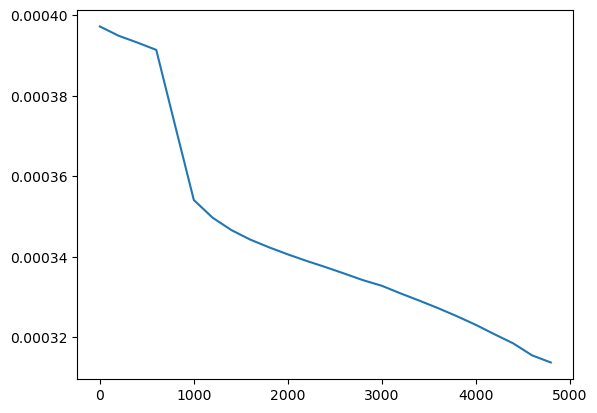

In [1045]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 1s 971us/step
Root Mean Square Error:  0.11754614806030399
Root Mean Square Error:  0.09985035099040623


Text(0.5, 1.0, 'SOH real-time prediction')

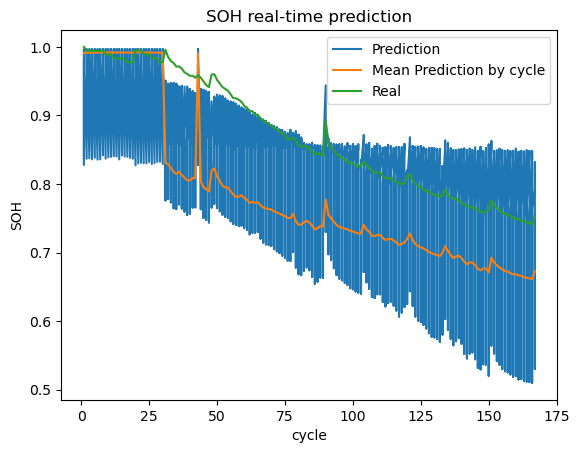

In [1046]:
b7_SOH_predict = model_b7_2h.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()

rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# Three hidden layer

In [1047]:
input_layer_b7_h3 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3 = keras.layers.Dense(10, activation='relu')(input_layer_b7_h3)
hidden_layer2_b7_h3 = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_h3)
hidden_layer3_b7_h3 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3)
output_layer_b7_h3 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3)
model_b7_h3 = keras.Model(input_layer_b7_h3, output_layer_b7_h3)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3 = custom_train(model_b7_h3, optimizer, loss_function, metric)
model_b7_h3.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_69 (Dense)            (None, 10)                60        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 10)                110       
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1051]:
loss_list, epoch_list = my_train_b7_h3.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0132 Training loss (for one batch) at step 0: 0.0004 Time taken: 0.02s 
Training acc over epoch: 0.0138 Training loss (for one batch) at step 200: 0.0005 Time taken: 3.04s 
Training acc over epoch: 0.0131 Training loss (for one batch) at step 400: 0.0004 Time taken: 5.97s 
Training acc over epoch: 0.0130 Training loss (for one batch) at step 600: 0.0004 Time taken: 8.88s 
Training acc over epoch: 0.0129 Training loss (for one batch) at step 800: 0.0004 Time taken: 11.85s 
Training acc over epoch: 0.0129 Training loss (for one batch) at step 1000: 0.0004 Time taken: 14.64s 
Training acc over epoch: 0.0128 Training loss (for one batch) at step 1200: 0.0004 Time taken: 17.49s 
Training acc over epoch: 0.0127 Training loss (for one batch) at step 1400: 0.0004 Time taken: 20.31s 
Training acc over epoch: 0.0127 Training loss (for one batch) at step 1600: 0.0004 Time taken: 23.16s 
Training acc over epoch: 0.0126 Training loss (for one batch) at step 1800: 0.0004 T

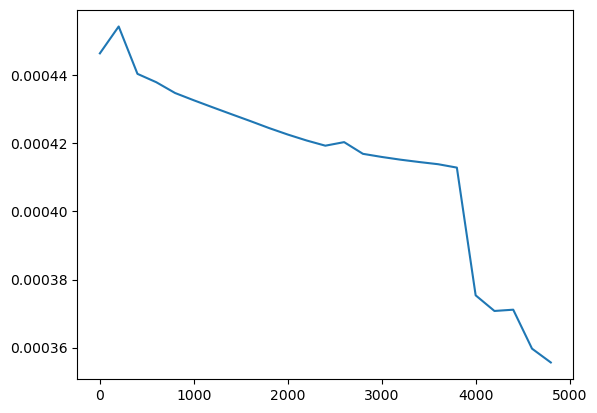

In [1052]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.10164405070847275
Root Mean Square Error:  0.08715742082527035


Text(0.5, 1.0, 'SOH real-time prediction')

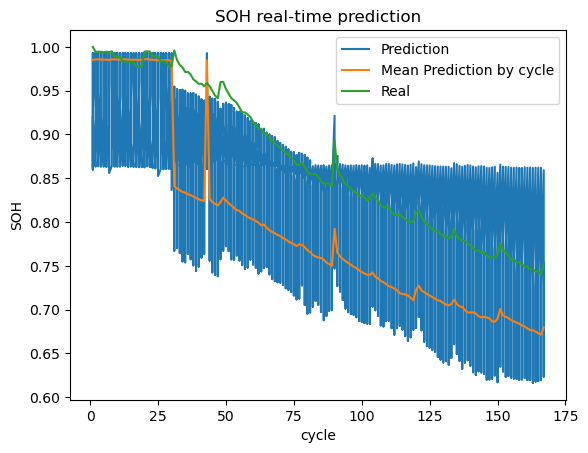

In [1092]:
b7_SOH_predict = model_b7_h3.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# Four hidden layer

In [1056]:
input_layer_b7_h4 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h4 = keras.layers.Dense(10, activation='relu')(input_layer_b7_h4)
hidden_layer2_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_h4)
hidden_layer3_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h4)
hidden_layer4_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer3_b7_h4)
output_layer_b7_h4 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer4_b7_h4)
model_b7_h4 = keras.Model(input_layer_b7_h4, output_layer_b7_h4)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h4 = custom_train(model_b7_h4, optimizer, loss_function, metric)
model_b7_h4.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_83 (Dense)            (None, 10)                60        
                                                                 
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 dense_85 (Dense)            (None, 10)                110       
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
 dense_87 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable para

In [1058]:
loss_list, epoch_list = my_train_b7_h4.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0111 Training loss (for one batch) at step 0: 0.0003 Time taken: 0.02s 
Training acc over epoch: 0.0110 Training loss (for one batch) at step 200: 0.0003 Time taken: 3.09s 
Training acc over epoch: 0.0109 Training loss (for one batch) at step 400: 0.0003 Time taken: 6.15s 
Training acc over epoch: 0.0108 Training loss (for one batch) at step 600: 0.0003 Time taken: 9.24s 
Training acc over epoch: 0.0107 Training loss (for one batch) at step 800: 0.0003 Time taken: 12.40s 
Training acc over epoch: 0.0106 Training loss (for one batch) at step 1000: 0.0003 Time taken: 15.49s 
Training acc over epoch: 0.0105 Training loss (for one batch) at step 1200: 0.0003 Time taken: 18.64s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 1400: 0.0003 Time taken: 21.76s 
Training acc over epoch: 0.0103 Training loss (for one batch) at step 1600: 0.0003 Time taken: 24.90s 
Training acc over epoch: 0.0103 Training loss (for one batch) at step 1800: 0.0003 T

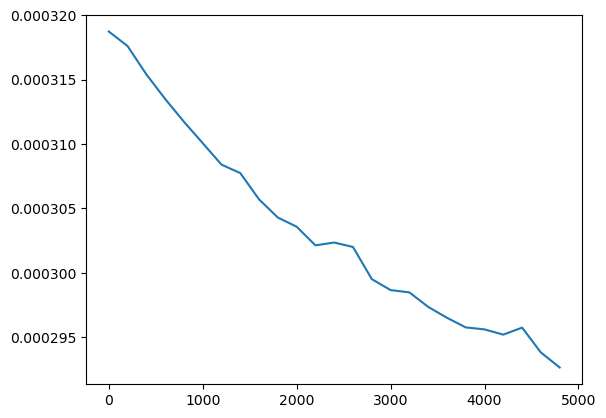

In [1059]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.11544185158610197
Root Mean Square Error:  0.0984740173039406


Text(0.5, 1.0, 'SOH real-time prediction')

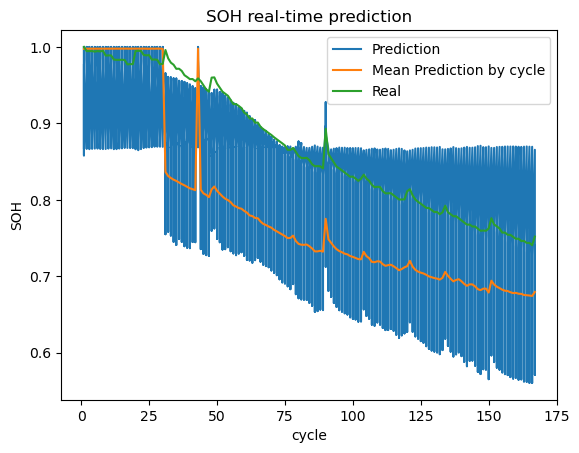

In [1091]:
b7_SOH_predict = model_b7_h4.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# three hidden layer, 20 dense

In [1064]:
input_layer_b7_h3_t20 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(input_layer_b7_h3_t20)
hidden_layer2_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(hidden_layer_b7_h3_t20)
hidden_layer3_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(hidden_layer2_b7_h3_t20)
output_layer_b7_h3_t20 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_t20)
model_b7_h3_t20 = keras.Model(input_layer_b7_h3_t20, output_layer_b7_h3_t20)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_t20 = custom_train(model_b7_h3_t20, optimizer, loss_function, metric)
model_b7_h3_t20.summary()

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_96 (Dense)            (None, 20)                120       
                                                                 
 dense_97 (Dense)            (None, 20)                420       
                                                                 
 dense_98 (Dense)            (None, 20)                420       
                                                                 
 dense_99 (Dense)            (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [1105]:
loss_list, epoch_list = my_train_b7_h3_t20.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.0001)

Training acc over epoch: 0.0075 Training loss (for one batch) at step 0: 0.0002 Time taken: 0.02s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 200: 0.0001 Time taken: 3.12s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 400: 0.0001 Time taken: 6.08s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 600: 0.0001 Time taken: 8.98s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 800: 0.0001 Time taken: 11.97s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1000: 0.0001 Time taken: 14.83s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1200: 0.0001 Time taken: 17.67s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1400: 0.0001 Time taken: 20.72s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 1600: 0.0002 Time taken: 23.57s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1800: 0.0001 T

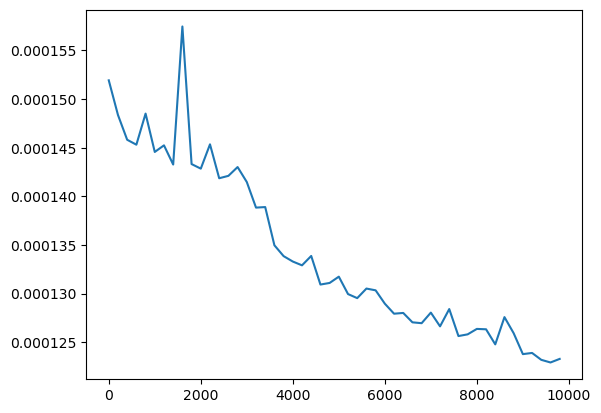

In [1106]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.1389613911037613
Root Mean Square Error:  0.12254133816429609


Text(0.5, 1.0, 'SOH real-time prediction')

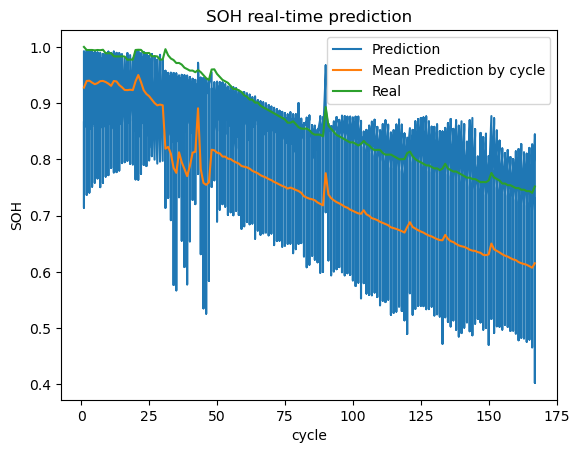

In [1107]:
b7_SOH_predict = model_b7_h3_t20.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# three hidden, 10 dense, sigmoid

In [1071]:
input_layer_b7_h3_sig = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(input_layer_b7_h3_sig)
hidden_layer2_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(hidden_layer_b7_h3_sig)
hidden_layer3_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(hidden_layer2_b7_h3_sig)
output_layer_b7_h3_sig = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_sig)
model_b7_h3_sig = keras.Model(input_layer_b7_h3_sig, output_layer_b7_h3_sig)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_sig = custom_train(model_b7_h3_sig, optimizer, loss_function, metric)
model_b7_h3_sig.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_100 (Dense)           (None, 10)                60        
                                                                 
 dense_101 (Dense)           (None, 10)                110       
                                                                 
 dense_102 (Dense)           (None, 10)                110       
                                                                 
 dense_103 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1079]:
loss_list, epoch_list = my_train_b7_h3_sig.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0083 Training loss (for one batch) at step 0: 0.0002 Time taken: 0.02s 
Training acc over epoch: 0.0082 Training loss (for one batch) at step 200: 0.0002 Time taken: 3.04s 
Training acc over epoch: 0.0080 Training loss (for one batch) at step 400: 0.0002 Time taken: 6.11s 
Training acc over epoch: 0.0079 Training loss (for one batch) at step 600: 0.0002 Time taken: 9.26s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 800: 0.0002 Time taken: 12.11s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 1000: 0.0002 Time taken: 14.98s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 1200: 0.0002 Time taken: 17.80s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 1400: 0.0002 Time taken: 20.65s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1600: 0.0002 Time taken: 23.52s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1800: 0.0002 T

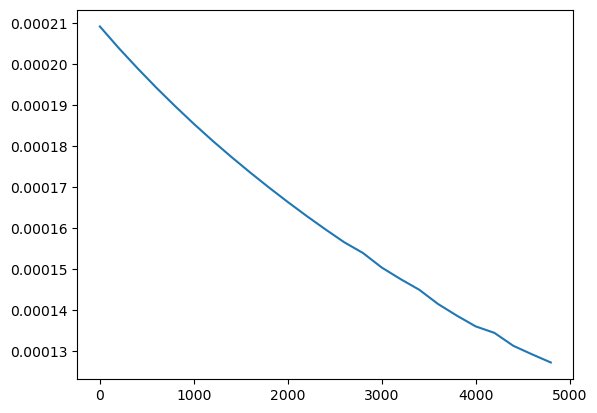

In [1080]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.12259336812253398
Root Mean Square Error:  0.11194377646674657


Text(0.5, 1.0, 'SOH real-time prediction')

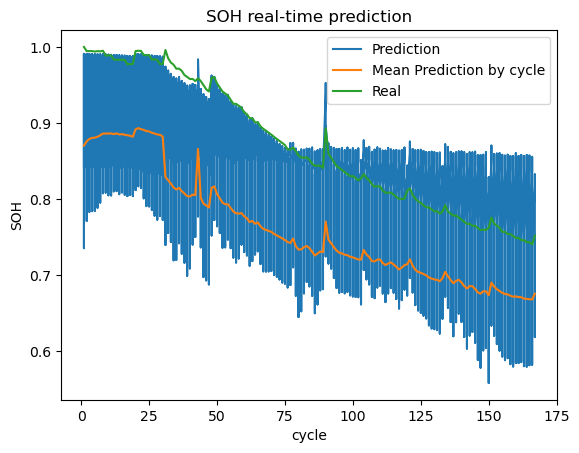

In [1089]:
b7_SOH_predict = model_b7_h3_sig.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1082]:
input_layer_b7_h3_no = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_no = keras.layers.Dense(10)(input_layer_b7_h3_no)
hidden_layer2_b7_h3_no = keras.layers.Dense(10)(hidden_layer_b7_h3_no)
hidden_layer3_b7_h3_no = keras.layers.Dense(10)(hidden_layer2_b7_h3_no)
output_layer_b7_h3_no = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_no)
model_b7_h3_no = keras.Model(input_layer_b7_h3_no, output_layer_b7_h3_no)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_no = custom_train(model_b7_h3_no, optimizer, loss_function, metric)
model_b7_h3_no.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_104 (Dense)           (None, 10)                60        
                                                                 
 dense_105 (Dense)           (None, 10)                110       
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1093]:
loss_list, epoch_list = my_train_b7_h3_no.train(b7_train_inputs, b7_train_SOH, 1000, 200, 0.0001)

Training acc over epoch: 0.0392 Training loss (for one batch) at step 0: 0.0028 Time taken: 0.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 200: 0.0028 Time taken: 3.10s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 400: 0.0028 Time taken: 6.09s 
Training acc over epoch: 0.0391 Training loss (for one batch) at step 600: 0.0028 Time taken: 9.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 800: 0.0028 Time taken: 12.05s 


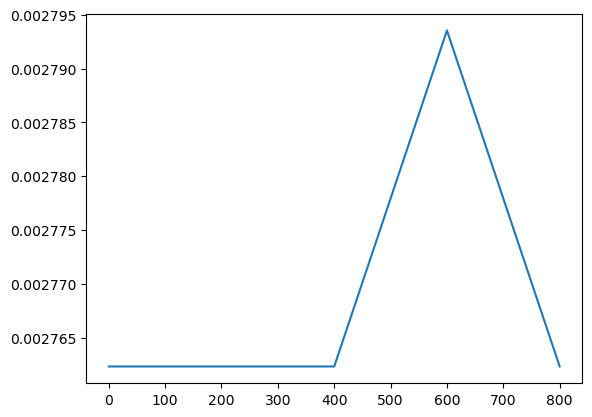

In [1094]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 990us/step
Root Mean Square Error:  0.05337036152133276
Root Mean Square Error:  0.04170778257748152


Text(0.5, 1.0, 'SOH real-time prediction')

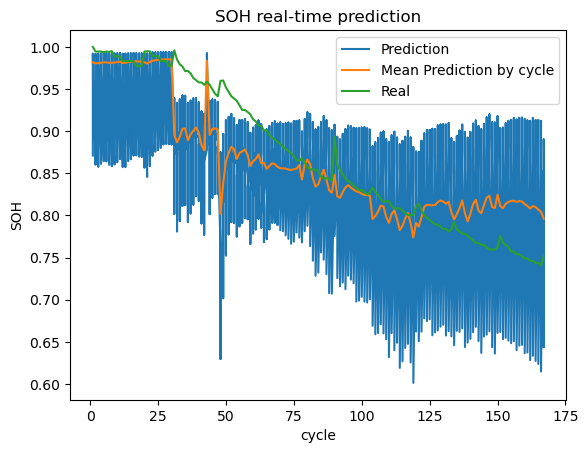

In [1095]:
b7_SOH_predict = model_b7_h3_no.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# four hidden layer, no activation

In [1097]:
input_layer_b7_h4_no = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h4_no = keras.layers.Dense(10)(input_layer_b7_h4_no)
hidden_layer2_b7_h4_no = keras.layers.Dense(10)(hidden_layer_b7_h4_no)
hidden_layer3_b7_h4_no = keras.layers.Dense(10)(hidden_layer2_b7_h4_no)
hidden_layer4_b7_h4_no = keras.layers.Dense(10)(hidden_layer3_b7_h4_no)
output_layer_b7_h4_no = keras.layers.Dense(1, activation='sigmoid')(hidden_layer4_b7_h4_no)
model_b7_h4_no = keras.Model(input_layer_b7_h4_no, output_layer_b7_h4_no)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h4_no = custom_train(model_b7_h4_no, optimizer, loss_function, metric)
model_b7_h4_no.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_108 (Dense)           (None, 10)                60        
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
 dense_110 (Dense)           (None, 10)                110       
                                                                 
 dense_111 (Dense)           (None, 10)                110       
                                                                 
 dense_112 (Dense)           (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable para

In [1102]:
loss_list, epoch_list = my_train_b7_h4_no.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0392 Training loss (for one batch) at step 0: 0.0028 Time taken: 0.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 200: 0.0028 Time taken: 3.15s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 400: 0.0028 Time taken: 6.17s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 600: 0.0028 Time taken: 9.19s 
Training acc over epoch: 0.0391 Training loss (for one batch) at step 800: 0.0028 Time taken: 12.21s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1000: 0.0028 Time taken: 15.44s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1200: 0.0028 Time taken: 18.40s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1400: 0.0028 Time taken: 21.45s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1600: 0.0028 Time taken: 24.44s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1800: 0.0028 T

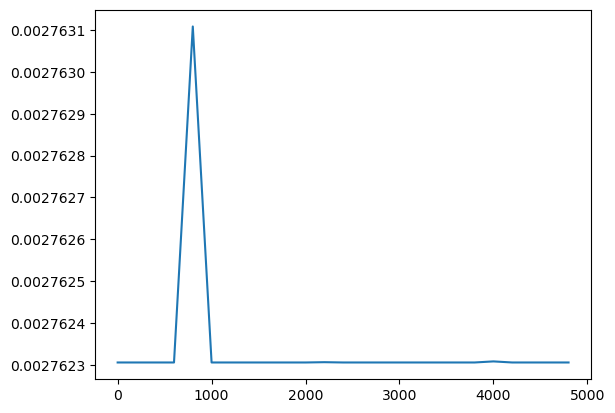

In [1103]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.053370367316848126
Root Mean Square Error:  0.04170776532345811


Text(0.5, 1.0, 'SOH real-time prediction')

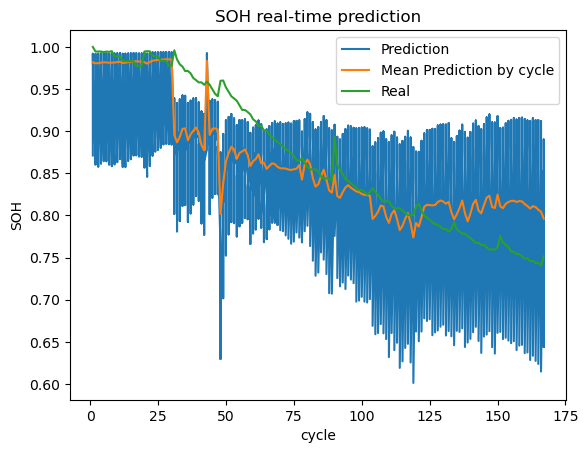

In [1104]:
b7_SOH_predict = model_b7_h4_no.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')